# <center>Fraud Detection E-commerce</center>

<img src='Fraud-Management-How-Do-I-Know-If-The-Charges-Are-Fraudulent2.svg' width="600">

The objective of this analysis is to create a machine learning model to detect fraudulent transactions for an e-commerce and financial service app serving 10,000+ customers in Uganda.


### Machine Learning Workflow

- <a href='#1'>1. Data</a>
    - <a href='#1.1'>1.1. Import Preliminary Libraries</a>
    - <a href='#1.2'>1.2. Data Overview</a>
- <a href='#2'>2. Data Cleaning  and Feature Engineering</a>
- <a href='#3'>3. Exploratory Analysis</a>
    - <a href='#3.1'>3.1. Profiling Fraudulent transactions - Average number of fraudulent transactions according to dates</a>
    - <a href='#3.2'>3.2. Profiling Fraudulent transactions - Average number of fraudulent transactions per category</a>
    - <a href='#3.3'>3.3. Value of Purchases for fradualent and non-fraudelent transactions</a>
    - <a href='#3.4'>3.4. Value of credit transaction for fradualent and non-fraudelent transactions </a>
    
-  <a href='#4'>4. Data Processing</a>
    - <a href='#4.1'>4.1. Date Encoding and Standardization </a>
    - <a href='#4.2'>4.2. Imbalanced dataset - resampling the target outcome </a>
    - <a href='#4.3'>4.3. Feature Selection </a>
        - <a href='#4.3.1'>4.3.1. Recursive feature elimination¶ (RFE) </a>
-  <a href='#5'>5. Machine Learning</a>
    - <a href='#5.1'>5.1. Logistic Regression Model </a>
    - <a href='#5.2'>5.2. KNN or k-Nearest Neighbors </a>
    - <a href='#5.3'>5.3. Random Forest </a>
    - <a href='#5.4'>5.4. Support Vector Machine </a>
    - <a href='#5.5'>5.5. Decision Tree </a>
-  <a href='#6'>6. Model Evaluation</a>
    - <a href='#6.1'>6.1. Model Selection </a>
    - <a href='#6.2'>6.2. Hyperparameter Tuning the Random Forest </a>
    


# <a id='1'>1.Data</a>

## <a id='1.1'>1.1. Import Preliminary Libraries</a>

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os
import pandas as pd
import seaborn as sns
import requests
import math
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.patches as mpatches

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
cd /home/simphiwe/Documents/notebooks/Fraud_Detection

/home/simphiwe/Documents/notebooks/Fraud_Detection


In [4]:
df1 = pd.read_csv('Xente_Variable_Definitions.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('training.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
TransactionId           95662 non-null object
BatchId                 95662 non-null object
AccountId               95662 non-null object
SubscriptionId          95662 non-null object
CustomerId              95662 non-null object
CurrencyCode            95662 non-null object
CountryCode             95662 non-null int64
ProviderId              95662 non-null object
ProductId               95662 non-null object
ProductCategory         95662 non-null object
ChannelId               95662 non-null object
Amount                  95662 non-null float64
Value                   95662 non-null int64
TransactionStartTime    95662 non-null object
PricingStrategy         95662 non-null int64
FraudResult             95662 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 11.7+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 15 columns):
TransactionId           45019 non-null object
BatchId                 45019 non-null object
AccountId               45019 non-null object
SubscriptionId          45019 non-null object
CustomerId              45019 non-null object
CurrencyCode            45019 non-null object
CountryCode             45019 non-null int64
ProviderId              45019 non-null object
ProductId               45019 non-null object
ProductCategory         45019 non-null object
ChannelId               45019 non-null object
Amount                  45019 non-null float64
Value                   45019 non-null int64
TransactionStartTime    45019 non-null object
PricingStrategy         45019 non-null int64
dtypes: float64(1), int64(3), object(11)
memory usage: 5.2+ MB


## <a id='1.2'>1.2. Data Overview</a>

In [7]:
train

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [8]:
print ("Rows     : " ,train.shape[0])
print ("Columns  : " ,train.shape[1])
print ("\nFeatures : \n" ,train.columns.tolist())
print ("\nMissing values :  ", train.isnull().sum().values.sum())
print ("\nUnique values :  \n",train.nunique())

Rows     :  95662
Columns  :  16

Features : 
 ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']

Missing values :   0

Unique values :  
 TransactionId           95662
BatchId                 94809
AccountId                3633
SubscriptionId           3627
CustomerId               3742
CurrencyCode                1
CountryCode                 1
ProviderId                  6
ProductId                  23
ProductCategory             9
ChannelId                   4
Amount                   1676
Value                    1517
TransactionStartTime    94556
PricingStrategy             4
FraudResult                 2
dtype: int64


# <a id='2'>2. Data Cleaning and Feature engineering</a>

#### Concat the data frames and separate them later

In [9]:
df=pd.concat([train, test], axis=0, keys=['train', 'test']).reset_index()

In [10]:
df

,level_0,level_1,AccountId,Amount,BatchId,ChannelId,CountryCode,CurrencyCode,CustomerId,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId,SubscriptionId,TransactionId,TransactionStartTime,Value
0,train,0,AccountId_3957,1000.0,BatchId_36123,ChannelId_3,256,UGX,CustomerId_4406,0.0,2,airtime,ProductId_10,ProviderId_6,SubscriptionId_887,TransactionId_76871,2018-11-15T02:18:49Z,1000
1,train,1,AccountId_4841,-20.0,BatchId_15642,ChannelId_2,256,UGX,CustomerId_4406,0.0,2,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_73770,2018-11-15T02:19:08Z,20
2,train,2,AccountId_4229,500.0,BatchId_53941,ChannelId_3,256,UGX,CustomerId_4683,0.0,2,airtime,ProductId_1,ProviderId_6,SubscriptionId_222,TransactionId_26203,2018-11-15T02:44:21Z,500
3,train,3,AccountId_648,20000.0,BatchId_102363,ChannelId_3,256,UGX,CustomerId_988,0.0,2,utility_bill,ProductId_21,ProviderId_1,SubscriptionId_2185,TransactionId_380,2018-11-15T03:32:55Z,21800
4,train,4,AccountId_4841,-644.0,BatchId_38780,ChannelId_2,256,UGX,CustomerId_988,0.0,2,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_28195,2018-11-15T03:34:21Z,644
5,train,5,AccountId_1078,2000.0,BatchId_25954,ChannelId_3,256,UGX,CustomerId_1432,0.0,2,airtime,ProductId_3,ProviderId_6,SubscriptionId_4238,TransactionId_23223,2018-11-15T03:35:10Z,2000
6,train,6,AccountId_2442,10000.0,BatchId_118460,ChannelId_3,256,UGX,CustomerId_2858,0.0,4,airtime,ProductId_3,ProviderId_5,SubscriptionId_1980,TransactionId_118063,2018-11-15T03:44:31Z,10000
7,train,7,AccountId_4841,-500.0,BatchId_38561,ChannelId_2,256,UGX,CustomerId_2858,0.0,2,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_100640,2018-11-15T03:45:13Z,500
8,train,8,AccountId_272,500.0,BatchId_93774,ChannelId_3,256,UGX,CustomerId_598,0.0,2,airtime,ProductId_10,ProviderId_6,SubscriptionId_4731,TransactionId_51905,2018-11-15T04:14:59Z,500
9,train,9,AccountId_710,600.0,BatchId_82409,ChannelId_3,256,UGX,CustomerId_1053,0.0,2,financial_services,ProductId_15,ProviderId_1,SubscriptionId_920,TransactionId_130161,2018-11-15T04:31:48Z,600


#### Remove strings from entries

In [11]:
for col in df.filter(regex='Id'):
    df[col] = df[col].str.split('_').str[1] 

#### Reformat the time stamp

In [12]:
 df['timestamp'] = pd.to_datetime(df['TransactionStartTime'], format="%Y-%m-%dT%H:%M:%S%fZ")

In [13]:
df['day_of_week'] = df['timestamp'].dt.weekday_name #Name of the week
df['hours'] = df['timestamp'].dt.hour  #Hour
df['year'] = df['timestamp'].dt.year #year
df['month'] = df['timestamp'].dt.month_name() #day
df['date'] = pd.to_datetime(df['timestamp'].dt.date) #date w/o time

#### Group by the unique client id: Count the number of acc, transactions, product and supplier id

In [14]:
a = ['acc' 'trans', 'prod', 'prov', 'sub']
b= ['CustomerId', 'TransactionId', 'ProductId', 'ProviderId', 'SubscriptionId']

for i in a:
    for j in b:
        df['nr_' + i + '_per_client'] =  df.groupby('AccountId')[j].transform('nunique') 

##### Understanding the unique number of products bought and their source

In [15]:
#Number of products per batch of transactions processed

df['nr_prod_per_batch']= df.groupby('BatchId')['ProductId'].transform('nunique')

#### Account and client balance per day and per month 

In [16]:
#Client  and account balance per day
df['client_bal_day']= df.groupby(['AccountId', 'date'])['Amount'].transform('sum')
df['acc_bal_day']= df.groupby(['CustomerId', 'date'])['Amount'].transform('sum')


#Client  and account balance per month
df['client_bal_month']= df.groupby(['AccountId', 'month'])['Amount'].transform('sum')
df['acc_bal_month']= df.groupby(['CustomerId', 'month'])['Amount'].transform('sum')


#### Monthly changes in the account and client balances

In [17]:
df['client_bal_changes_day']= df.groupby(['AccountId', 'date'])['Amount'].transform('pct_change')
df['acc_bal_changes_month']= df.groupby(['CustomerId', 'month'])['Amount'].transform('pct_change')

##### Create categories for the time

In [18]:
def hour_cat(hour):
    return (
        "morning" if 5 <= hour < 12
        else
        "afternoon" if 12 <= hour < 17
        else
        "evening" if 17 <= hour <= 21
        else
        "night"
    )

In [19]:
df['hour_category'] = df.hours.apply(hour_cat)
# A quick ordering for plots

df['hour_category'] = pd.Categorical(df['hour_category'], 
                                     categories=['morning','afternoon', 'evening', 'night' ], ordered=True)

#### Classify transactions

In [20]:
df['Debit/Credit'] = np.where(df['Amount']<0, 'credit', 'debit')
df['log_amount_cr']=np.log(df.loc[df['Debit/Credit']=='credit', 'Value']) #Refunds or credit
df['log_amount_dr']=np.log(df.loc[df['Debit/Credit']=='debit', 'Value']) #Purchases

#### Change the dtype

In [21]:
df['FraudResult'] = df['FraudResult'].astype('?') #Boolean

#Categorical
for col in ['ProviderId', 'ProductCategory', 'ChannelId', 'PricingStrategy', 'month', 'day_of_week', 
            'hours', 'year', 'hour_category']:
    df[col] = df[col].astype('category')


#### Drop unnecessary columns

In [22]:
df=df.drop(['CurrencyCode', 'CountryCode', 'level_1'], axis=1)

# <a id='3'>3. Exploratory Data Analysis</a>

### <a id='3.1'>3.1. Profiling Fraudulent transactions - Average number of fraudulent transactions according to dates </a>

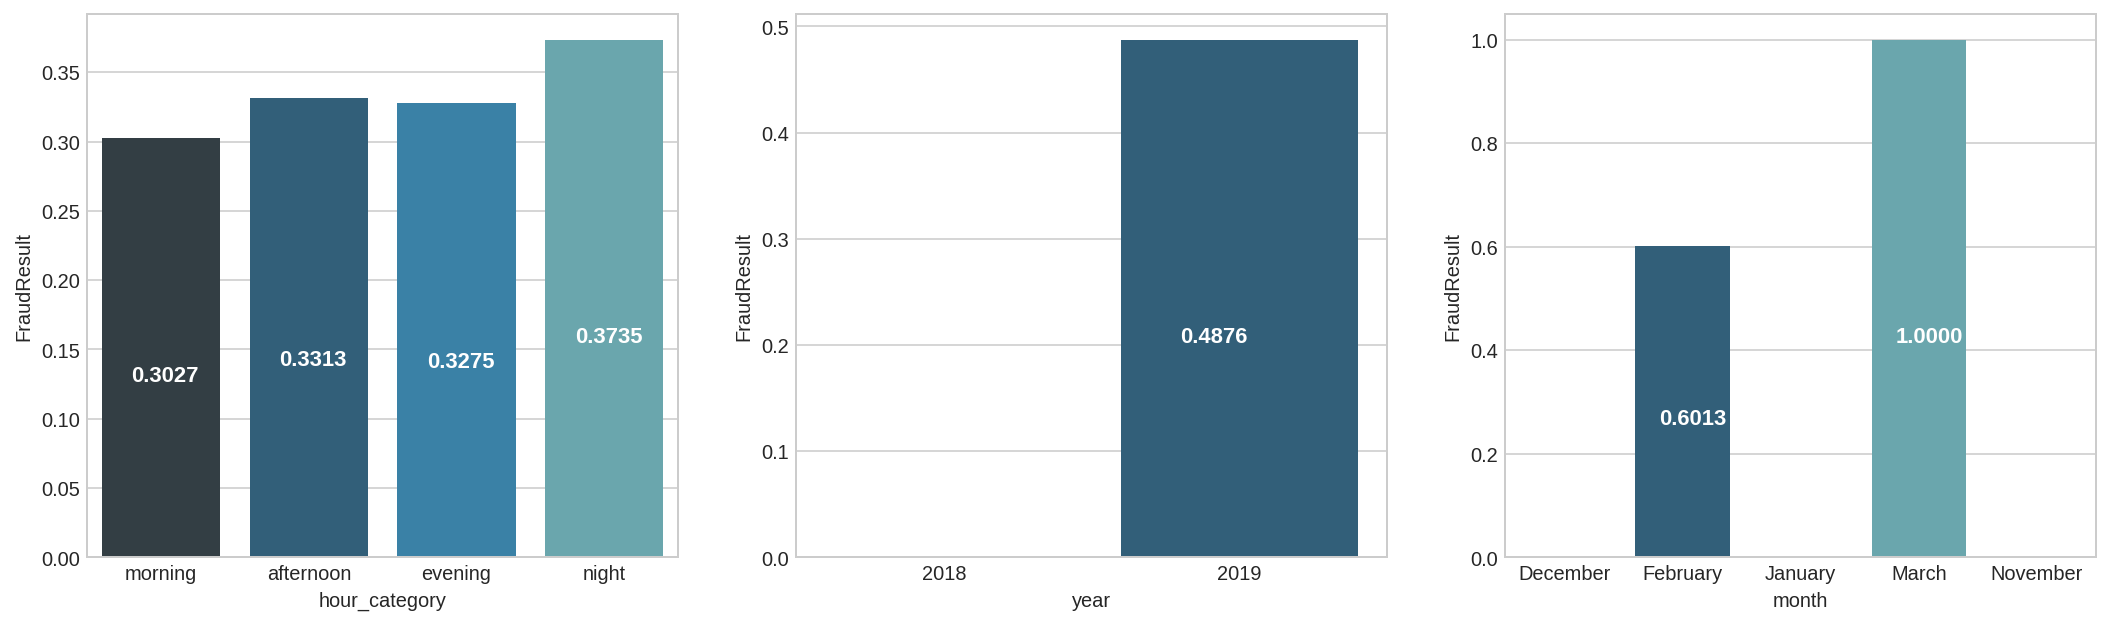

In [23]:
#Plotstyle
plt.style.use('seaborn-whitegrid')
from matplotlib.colors import ListedColormap  #import colourmap

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cmap = ListedColormap(sns.color_palette('YlGnBu_d', 12))
outer_colors = cmap(np.arange(30)*3)

#Main graphs
for col, ax in zip(['hour_category', 'year', 'month'], axes.flatten()):
    sns.barplot(x=col, y='FraudResult', data=df, ax=ax, palette=outer_colors, ci=None)
    #legend=ax.legend(['Churned','Non-Churned'],
                     #loc='best')

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.4f}'.format(height), (p.get_x()+.25*width, p.get_y()+ 0.4*height),
             xytext=(0,4), textcoords='offset points',
                color='white', fontweight='bold', fontsize=11)

### <a id='3.2'>3.2. Profiling Fraudulent transactions - Average number of fraudulent transactions per category </a>

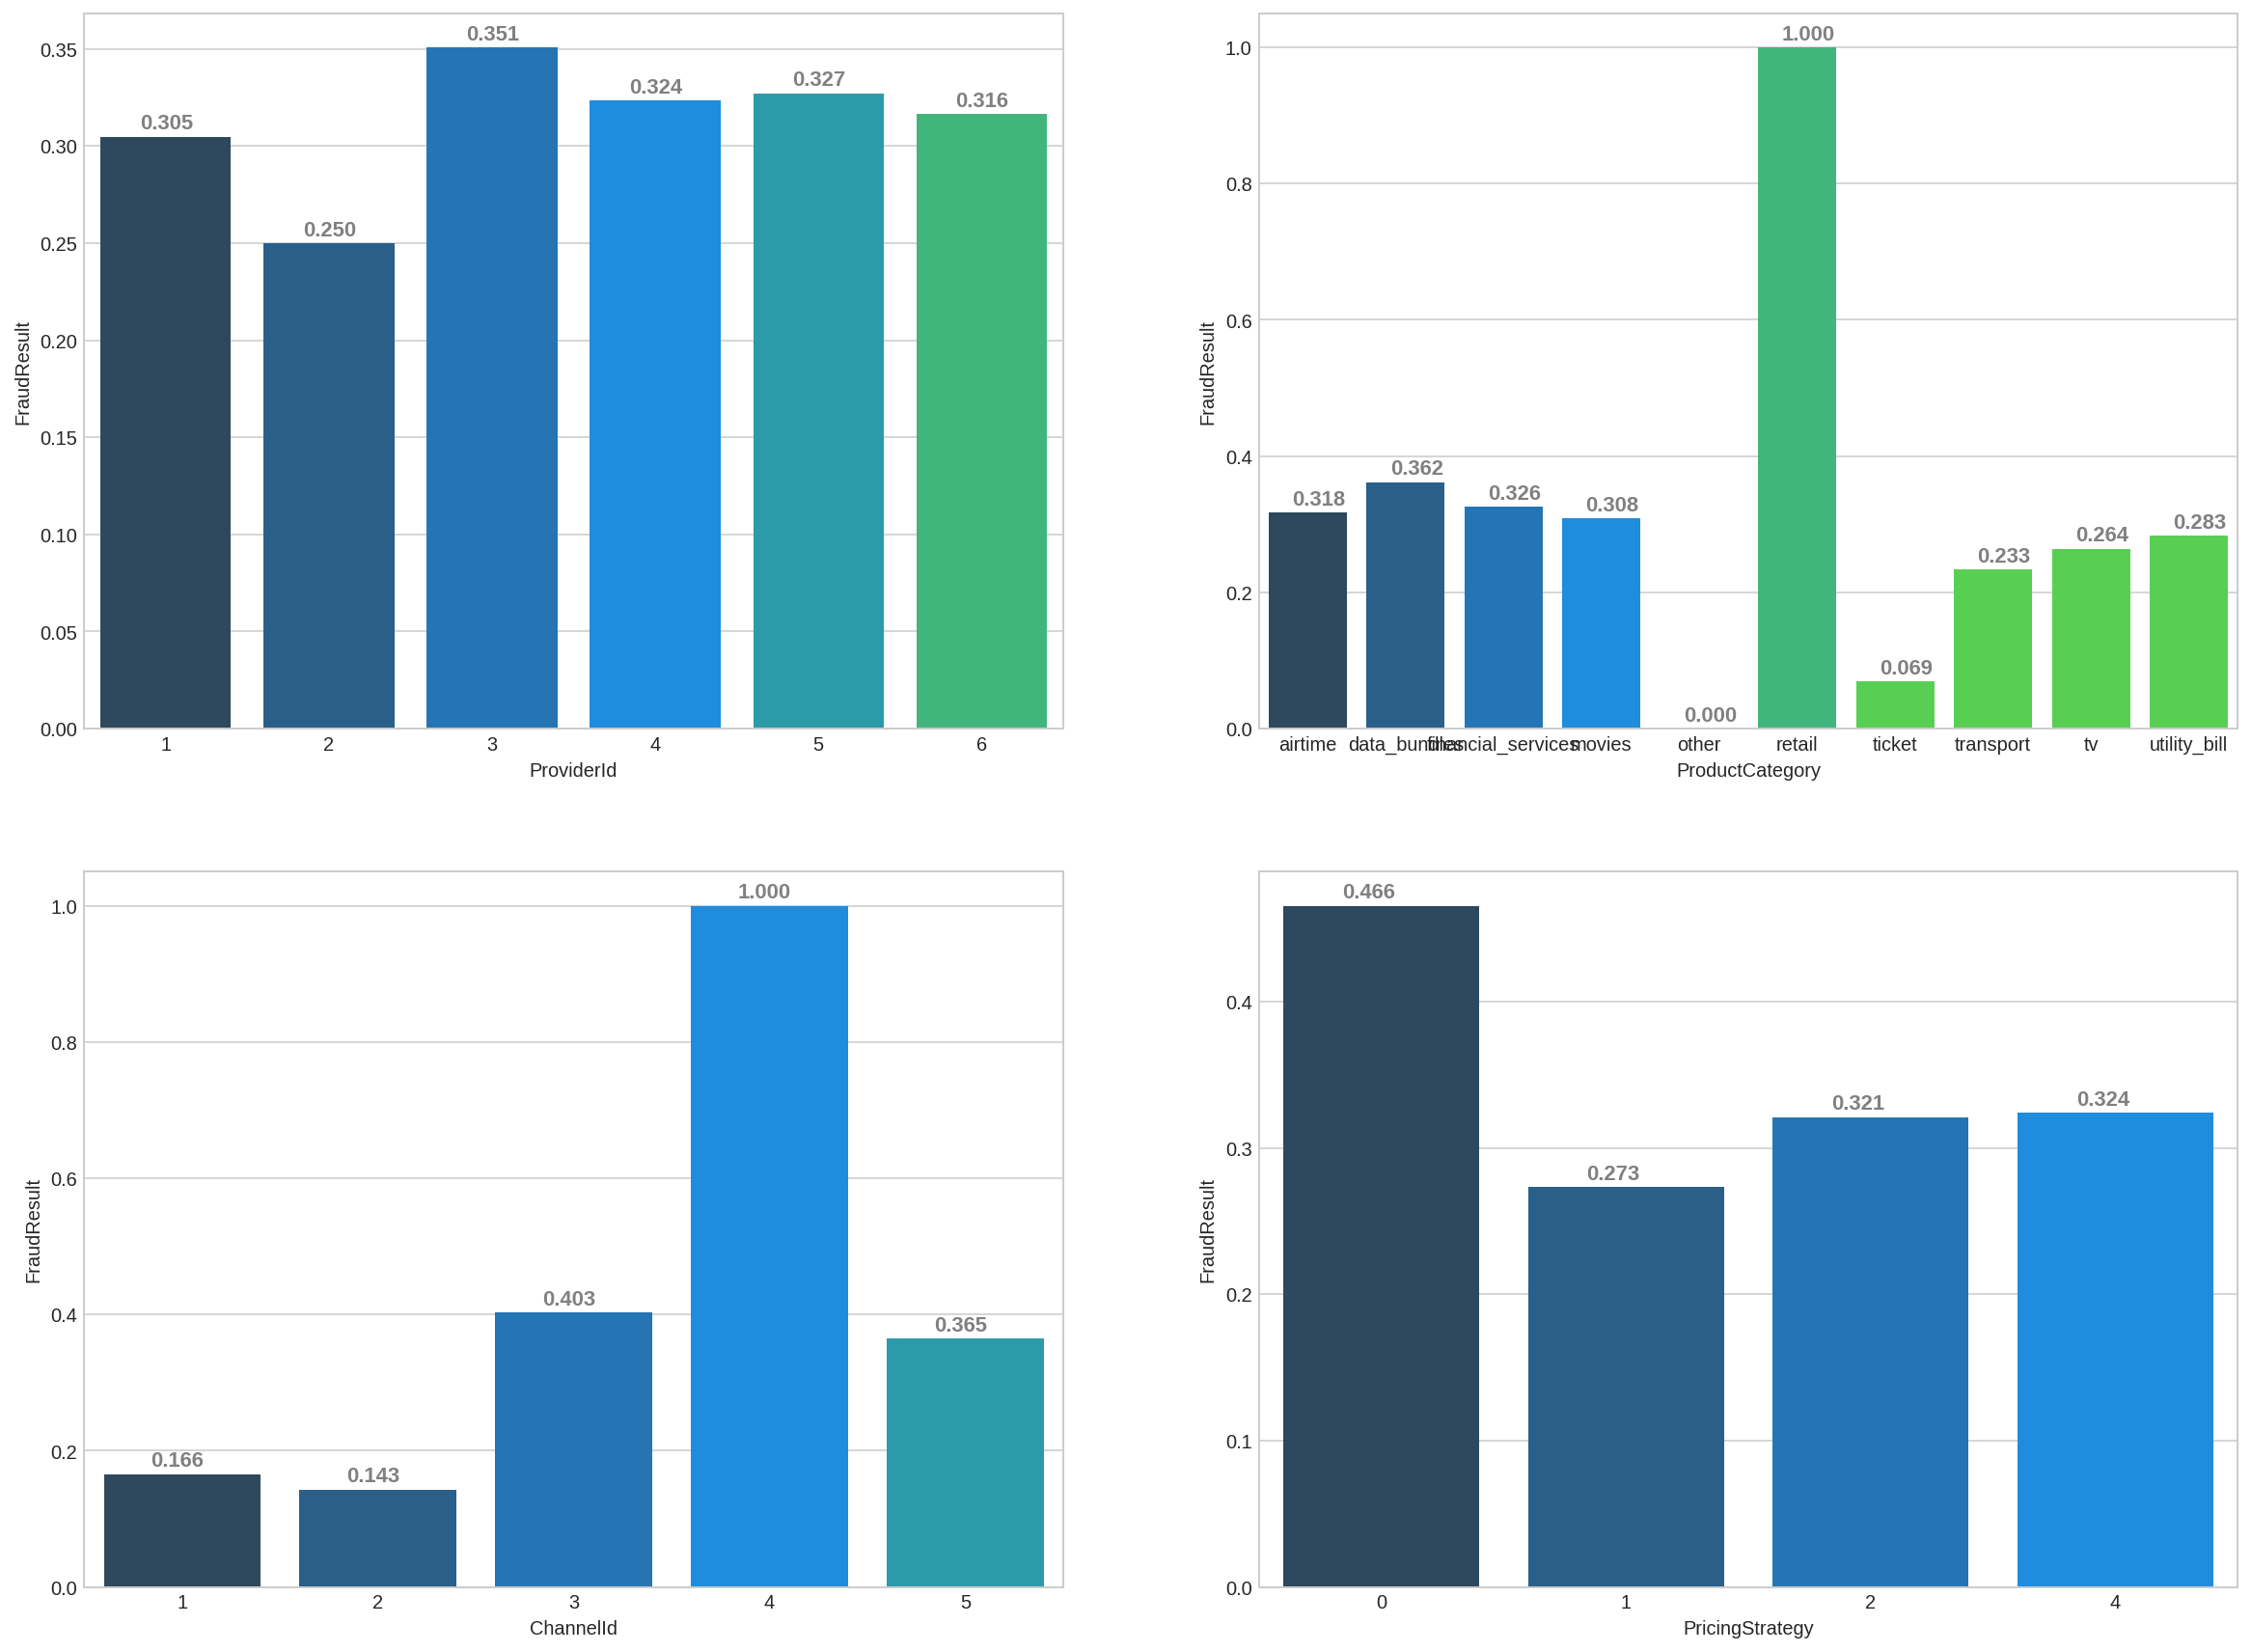

In [24]:
#Plotstyle
plt.style.use('seaborn-whitegrid')
from matplotlib.colors import ListedColormap  #import colourmap

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

cmap = ListedColormap(sns.color_palette('gist_rainbow_d', 7))
outer_colors = cmap(np.arange(30)*1)

#Main graphs
for col, ax in zip(['ProviderId', 'ProductCategory', 'ChannelId', 'PricingStrategy'], axes.flatten()):
    sns.barplot(x=col, y='FraudResult', data=df, ax=ax, palette=outer_colors, ci=None)
    #legend=ax.legend(['Churned','Non-Churned'],
                     #loc='best')

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.3f}'.format(height), (p.get_x()+.30*width, p.get_y()+ height),
             xytext=(0,4), textcoords='offset points',
                color='grey', fontweight='bold', fontsize=11)

### <a id='3.3'>3.3. Value of Purchases for fradualent and non-fraudelent transactions </a>

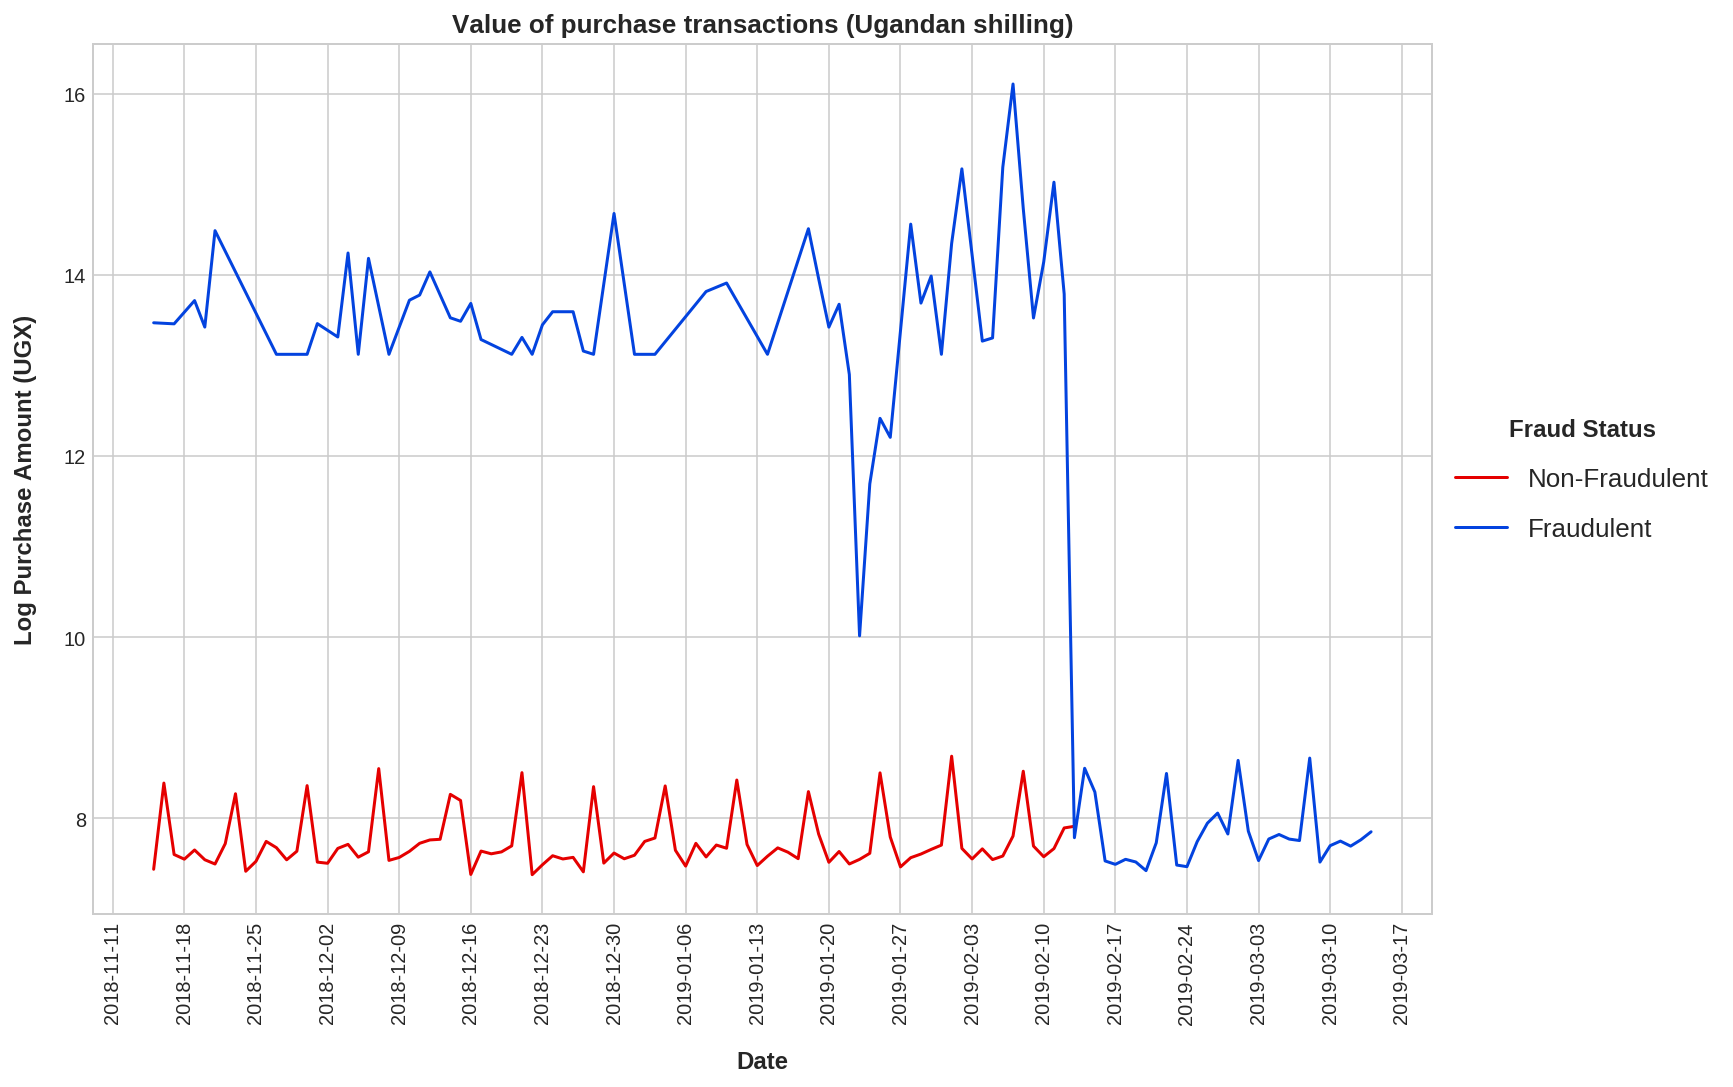

In [25]:
#Purchase transaction amounts
import matplotlib.ticker as ticker
#Plotstyle
plt.style.use('seaborn-whitegrid')

#Colour palette
col_list = ['red', 'blue']
col_list_palette = sns.xkcd_palette(col_list)
cmap = sns.set_palette(col_list_palette)




#Size of the figure
plt.rcParams["figure.figsize"]=12,8 #(width, height)

ax=sns.lineplot(x="date", y='log_amount_dr', hue='FraudResult', ci=None, data=df,  
                palette=cmap)

#Legend
lg=ax.legend(['Non-Fraudulent', 'Fraudulent'],
          title="Fraud Status",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize=13, labelspacing=1)

title = lg.get_title()
title.set_fontsize(12)
title.set_weight('bold')

# Specify the x-axis labels and then rotate
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)



#Axis labels and adjustments
plt.xlabel('Date', fontweight='bold', labelpad=13, fontsize=12)
plt.ylabel('Log Purchase Amount (UGX)', fontweight='bold', labelpad=13, fontsize=12)
plt.title('Value of purchase transactions (Ugandan shilling)', fontweight='bold', fontsize=13)

plt.show()

### <a id='3.4'>3.4. Value of credit transaction for fradualent and non-fraudelent transactions </a>

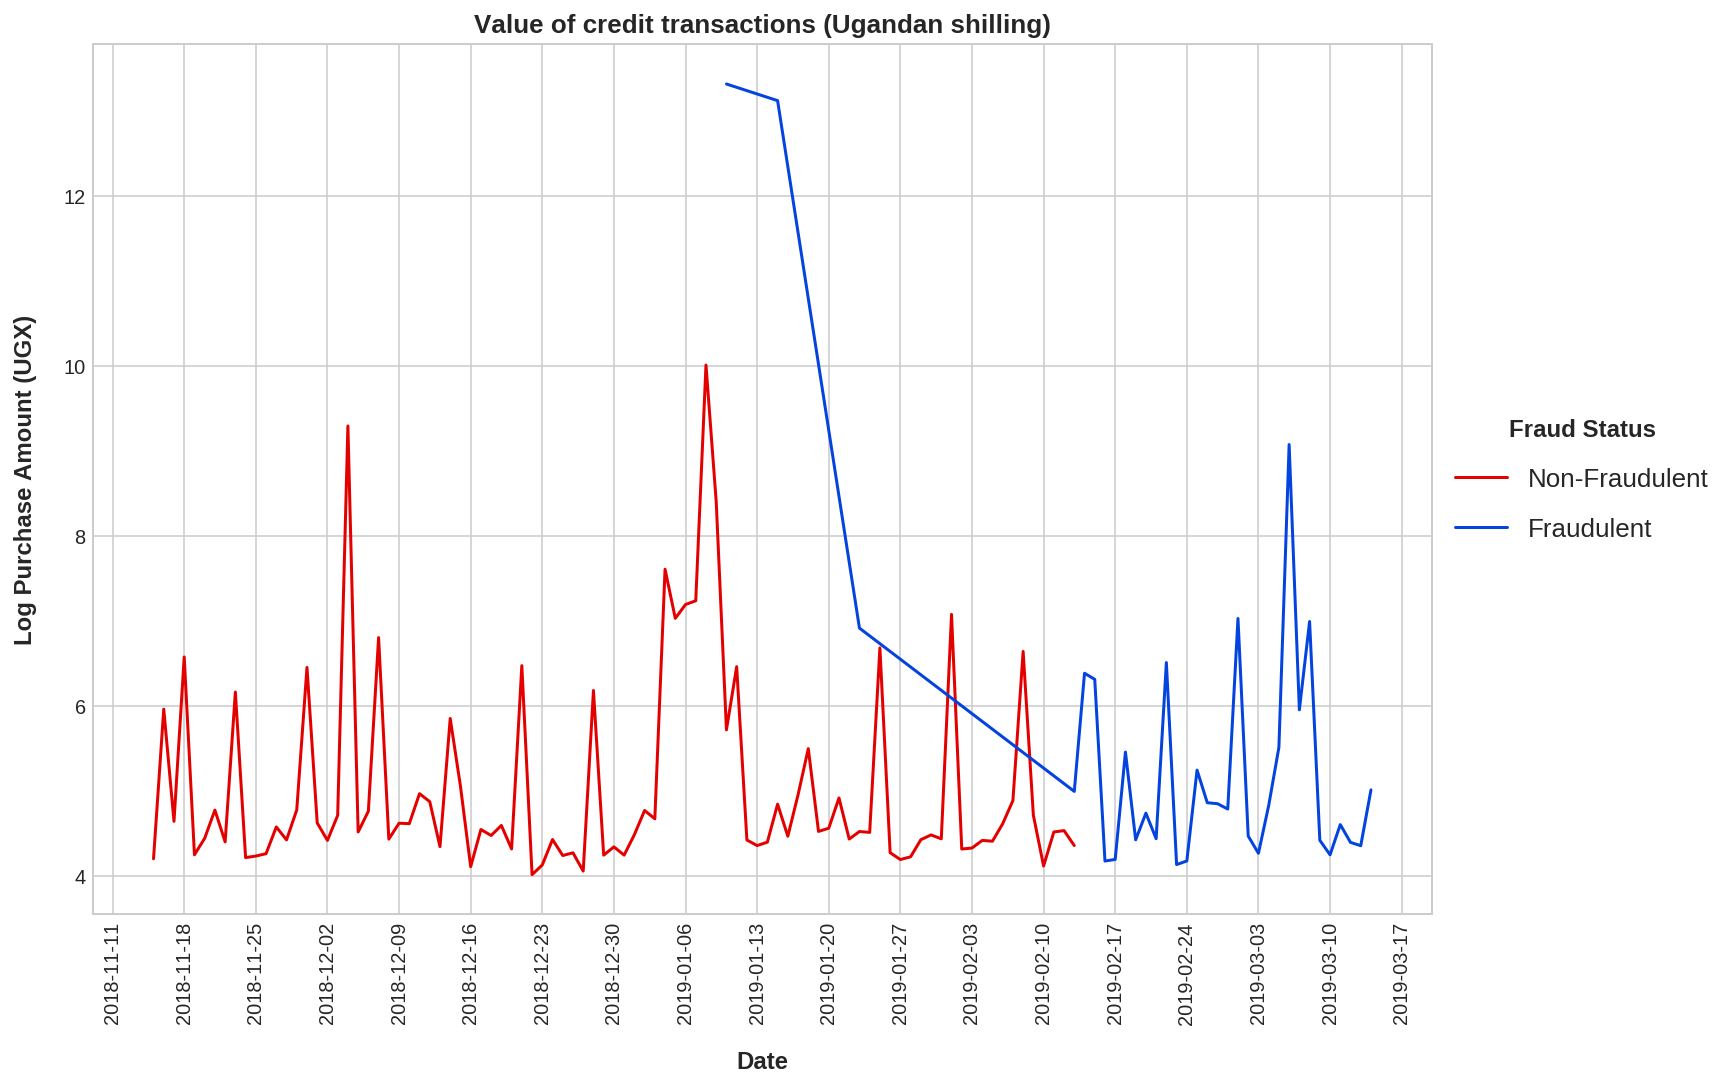

In [26]:
#Purchase transaction amounts
import matplotlib.ticker as ticker
#Plotstyle
plt.style.use('seaborn-whitegrid')

#Colour palette
col_list = ['red', 'blue']
col_list_palette = sns.xkcd_palette(col_list)
cmap = sns.set_palette(col_list_palette)




#Size of the figure
plt.rcParams["figure.figsize"]=12,8 #(width, height)

ax=sns.lineplot(x="date", y='log_amount_cr', hue='FraudResult', ci=None, data=df,  
                palette=cmap)


#Legend
lg=ax.legend(['Non-Fraudulent', 'Fraudulent'],
          title="Fraud Status",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize=13, labelspacing=1)

title = lg.get_title()
title.set_fontsize(12)
title.set_weight('bold')

# Specify the x-axis labels and then rotate
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)



#Axis labels and adjustments
plt.xlabel('Date', fontweight='bold', labelpad=13, fontsize=12)
plt.ylabel('Log Purchase Amount (UGX)', fontweight='bold', labelpad=13, fontsize=12)
plt.title('Value of credit transactions (Ugandan shilling)', fontweight='bold', fontsize=13)

plt.show()

In [27]:
pd.crosstab(df['Debit/Credit'], df['FraudResult'], margins=True)/len(df)*100

FraudResult,False,True,All
Debit/Credit,,,
credit,27.142258,12.979009,40.121267
debit,40.719784,19.158948,59.878733
All,67.862042,32.137958,100.000000


# <a id='4'>4. Data Processing</a>

#### Label Encode Dummy Variables

In [28]:
dummy_cols   = ['FraudResult', 'Debit/Credit']

#Label encoding Binary columns
for i in dummy_cols :
    df[i] = LabelEncoder().fit_transform(df[i])

In [29]:
df

,level_0,AccountId,Amount,BatchId,ChannelId,CustomerId,FraudResult,PricingStrategy,ProductCategory,ProductId,...,client_bal_day,acc_bal_day,client_bal_month,acc_bal_month,client_bal_changes_day,acc_bal_changes_month,hour_category,Debit/Credit,log_amount_cr,log_amount_dr
0,train,3957,1000.0,36123,3,4406,0,2,airtime,10,...,1000.00,980.0,75665.00,63145.0,-0.960199,9.000000,night,1,NaN,6.907755
1,train,4841,-20.0,15642,2,4406,0,2,financial_services,6,...,-26582.85,980.0,-3657058.04,63145.0,NaN,9.000000,night,0,2.995732,NaN
2,train,4229,500.0,53941,3,4683,0,2,airtime,1,...,500.00,500.0,1000.00,1000.0,49.000000,-1.050000,night,1,NaN,6.214608
3,train,648,20000.0,102363,3,988,0,2,utility_bill,21,...,50000.00,48756.0,150000.00,148756.0,-0.733333,-1.714286,night,1,NaN,9.989665
4,train,4841,-644.0,38780,2,988,0,2,financial_services,6,...,-26582.85,48756.0,-3657058.04,148756.0,NaN,-1.714286,night,0,6.467699,NaN
5,train,1078,2000.0,25954,3,1432,0,2,airtime,3,...,2000.00,2000.0,2000.00,2000.0,0.000000,-1.020000,night,1,NaN,7.600902
6,train,2442,10000.0,118460,3,2858,0,4,airtime,3,...,10000.00,9500.0,32000.00,30500.0,-0.900000,1.000000,night,1,NaN,9.210340
7,train,4841,-500.0,38561,2,2858,0,2,financial_services,6,...,-26582.85,9500.0,-3657058.04,30500.0,NaN,1.000000,night,0,6.214608,NaN
8,train,272,500.0,93774,3,598,0,2,airtime,10,...,1200.00,1200.0,8200.00,8060.0,NaN,0.000000,night,1,NaN,6.214608
9,train,710,600.0,82409,3,1053,0,2,financial_services,15,...,13200.00,13200.0,13800.00,13788.0,1.500000,NaN,night,1,NaN,6.396930


#### Standardize numerical variables

In [30]:
num_cols = ['Amount', 'Value', 'nr_prod_per_batch', 'client_bal_day', 'acc_bal_day',
            'client_bal_month', 'acc_bal_month']

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_2 = df.copy()
df = df.drop(columns = num_cols, axis = 1)
df = df.merge(scaled, left_index=True, right_index=True, how = "left")

#### Get dummy variables from Categorical

In [31]:
categorical_vars = ['ProviderId', 'ProductCategory', 'ChannelId', 'PricingStrategy', 'month', 'day_of_week', 
            'hours', 'year', 'hour_category']
df= pd.get_dummies(data = df, columns= categorical_vars )

#### Features and target column

In [32]:
exclude =['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 
'ProductId', 'TransactionStartTime', 'FraudResult', 'timestamp', 'date', 'log_amount',
          'client_bal_changes_day', 'acc_bal_changes_month', 'nr_prov_per_client', 
          'nr_sub_per_client', 'log_amount','log_amount_cr', 'log_amount_dr', 'level_0']

X = df[[i for i in df.columns if i not in exclude]]

y= df['FraudResult']

## <a id='4.2'>4.2. Imbalanced dataset - resampling the target outcome </a>

#### Separating the data back into a test and training dataset

In [46]:
X_train=df[[i for i in df.columns if i not in exclude]].loc[df['level_0'] == 'train'] 
X_test=df[[i for i in df.columns if i not in exclude]].loc[df['level_0'] == 'test']
y_train=df['FraudResult'].loc[df['level_0'] == 'train'] 

#### Proportion and Visualization of the target outcome

In [69]:
target_count =y_train.value_counts()
print('False:', target_count[0])
print('True:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

False: 95469
True: 193
Proportion: 494.66 : 1


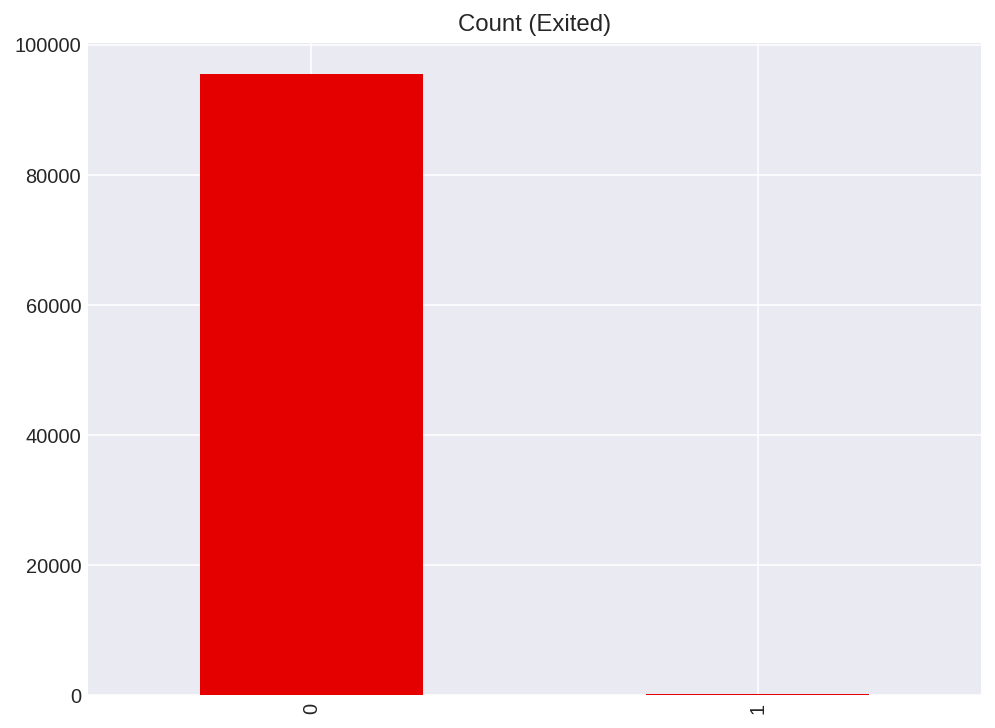

In [70]:
#Setting the style
plt.style.use('seaborn-darkgrid')

#Size of the figure
plt.rcParams["figure.figsize"]=8,6
target_count.plot(kind='bar', title='Count (Exited)')
plt.show()

#### We can use a resampling method to correct the imbalance and in this instance we use the Tomek links method

In [72]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)
X = X_sm
y = y_sm

1    95469
0    95469
dtype: int64

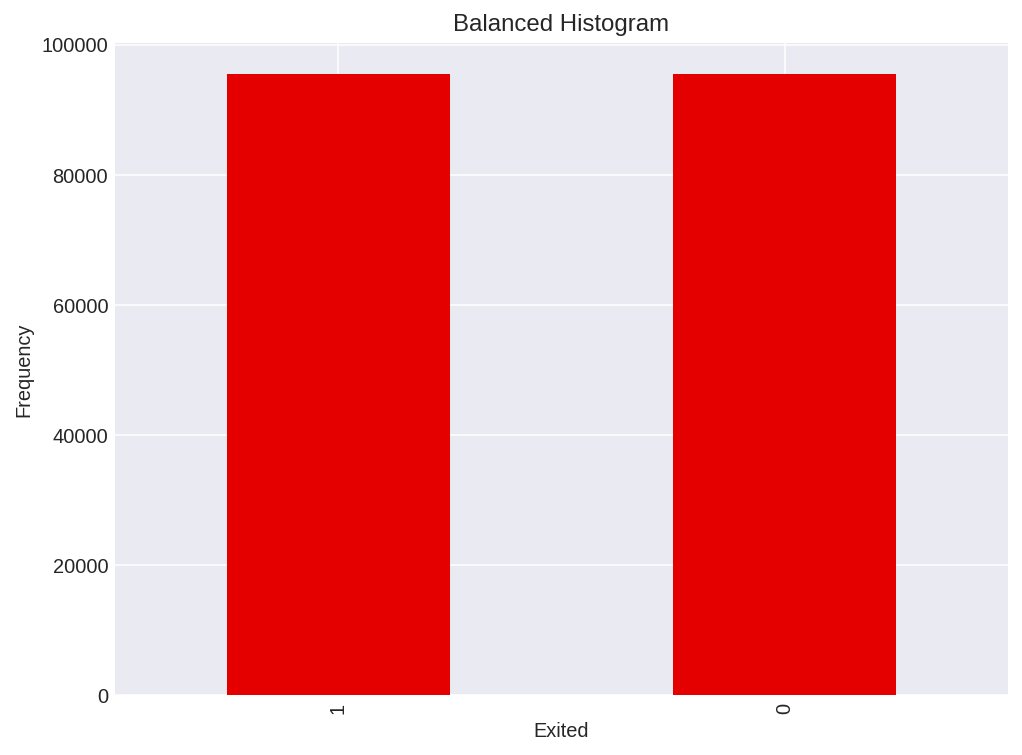

In [73]:
#Setting the style
plt.style.use('seaborn-darkgrid')

#Size of the figure
plt.rcParams["figure.figsize"]=8,6
pd.value_counts(y).plot.bar()
plt.title('Balanced Histogram')
plt.xlabel('Exited')
plt.ylabel('Frequency')
pd.value_counts(y)

## <a id='4.3'>4.3. Feature Selection </a>

### <a id='4.3.1'>4.3.1 Recursive feature elimination¶ (RFE) </a>


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


# Create the RFE object and compute a cross-validated score.
random_forest = RandomForestClassifier(n_estimators=400, random_state = 38)

# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=random_forest, step=1, cv=StratifiedKFold(2), scoring='accuracy')

rfecv.fit(X, y)

# <a id='5'>5. Machine Learning</a>

### <a id='5.1'>5.1. Logistic Regression Model </a>

In [47]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

log_model = LogisticRegression()

log_model.fit(X_train,y_train)

y_train_pred = log_model.predict(X_train)

y_test_pred = log_model.predict(X_test)

CPU times: user 1.69 s, sys: 444 ms, total: 2.13 s
Wall time: 1.72 s


#### Accuracy Score 

##### F1 Score 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score 
reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall 
to the F1 score are equal. 

In [48]:
f1_log=f1_score(y_train, y_train_pred, average='macro') 
f1_log

0.7428453958072653

### <a id='5.2'>5.2. KNN or k-Nearest Neighbors </a>

In [49]:
%%time

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

CPU times: user 12min 24s, sys: 845 ms, total: 12min 25s
Wall time: 12min 26s


##### Accuracy

In [50]:
f1_knn=f1_score(y_train, y_pred_knn, average='macro') 
f1_knn

0.9537342080919431

### <a id='5.3'>5.3. Random Forest </a>

In [51]:
%%time
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state = 38)
random_forest.fit(X_train, y_train)
y_pred_rf =from sklearn.ensemble import RandomForestClassifier random_forest.predict(X_train)
random_forest.score(X_train, y_train)

CPU times: user 6 s, sys: 60 ms, total: 6.06 s
Wall time: 6.05 s


##### Accuracy

In [52]:
f1_random_forest=f1_score(y_train, y_pred_rf, average='macro') 
f1_random_forest

0.9948081782454191

### <a id='5.4'>5.4. Support Vector Machine </a>

In [53]:
%%time
from sklearn.svm import SVC, LinearSVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_train)

CPU times: user 14.1 s, sys: 296 ms, total: 14.4 s
Wall time: 14.4 s


##### Accuracy

In [54]:
f1_svc=f1_score(y_train, y_pred_svc , average='macro')
f1_svc

0.9347799866032553

### <a id='5.5'>5.5. Decision Tree </a>

In [55]:
%%time
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_train)

CPU times: user 1.18 s, sys: 156 ms, total: 1.33 s
Wall time: 1.33 s


##### Accuracy

In [56]:
f1_decision_tree=f1_score(y_train, y_pred_dt , average='macro') 
f1_decision_tree

0.9947539235208674

# <a id='6'>6. Model Evaluation</a>

### <a id='6.1'>6.1. Model Selection </a>

In [58]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 
              'Decision Tree'],
    'F1_Score': [f1_svc, f1_knn, f1_log, 
              f1_random_forest, f1_decision_tree]})
models.sort_values(by='F1_Score', ascending=False)

,Model,F1_Score
3,Random Forest,0.994808
4,Decision Tree,0.994754
1,KNN,0.953734
0,Support Vector Machines,0.934780
2,Logistic Regression,0.742845


-  **The Random Forest outperforms other models** and is therefore a more suitable model given its F1 score of 0.994808 when we choose an arbitrary 100, we could look further into tuning the hyper parameters of a random forest.

### <a id='6.2'>6.2. Hyperparameter Tuning the Random Forest </a>

View the parameters of the random forest that lead to the score we got

In [59]:
print(RandomForestClassifier(n_estimators=100, random_state = 38).get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 38, 'verbose': 0, 'warm_start': False}


-  Using the Random Search Cross Validation method, we create a parameter grid to sample from when fitting.
-  Set ranges for pararmeters that the algorithm uses to find the best algorithm

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


-  Now we look for the best parameter

In [61]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=38, n_jobs=-1,
                              return_train_score=True)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 41.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=38, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
   

In [62]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 400}

In [63]:
best_random = rf_random.best_estimator_
y_pred_brf = best_random.predict(X_train)

##### Accuracy

In [64]:
f1_brf=f1_score(y_train, y_pred_brf , average='macro') 
f1_brf

0.9843435765161832

### Prediction of the Test Data

In [ ]:
y_pred_brf_test = best_random.predict(X_test)

#### Save submission to csv

In [ ]:
submission = pd.DataFrame({
        "TransactionId": test["PassengerId"],
        "FraudResult": y_pred_brf_test
    })

In [ ]:
submission.to_csv('../output/submission.csv', index=False)